<a href="https://colab.research.google.com/github/FUkrell/TrabajoEspecialista/blob/main/Federico_Krell_Trabajo_Especialista_UBA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Carga del dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

csv_file_path = '/content/drive/My Drive/engine_anon2.csv'


df = pd.read_csv(csv_file_path)



In [3]:
 import seaborn as sns
 from sklearn.metrics import confusion_matrix

El valor de alpha se establece en 2 para representar una relación 2:1 entre la importancia de identificar motores en mal estado y motores en buen estado. Los valores de tn_value y fp_value se calculan luego en función de alpha, tp_value y fn_value.

In [4]:
def custom_scoring_function(y_true, y_pred):
    # Calcular los valores de TP, TN, FP y FN a partir de la matriz de confusión
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    # Establecer el valor de alpha
    alpha = 2

    # Establecer los valores para tp_value y fn_value
    tp_value = 1
    fn_value = 1

    # Calcular los valores para tn_value y fp_value en función de alpha
    tn_value = alpha * tp_value
    fp_value = alpha * fn_value

    # Calcular la utilidad en función de los valores de TP, TN, FP y FN
    utility = tp * tp_value + tn * tn_value - fp * fp_value - fn * fn_value

    return utility




#Exploración inicial

In [5]:
df.head()

,orderid,unitno,modelid,evalcode,asample,prev,preva,oilchangelast,oilhours,PQI,...,Na,K,Mo,B,Fe,ST,V40,OXI,NIT,SUL
0,1,P,HME Model 1 type 3,A,1,2,0,1,252,0,...,10,9,1,1,15,20,105.2,12,6,19
1,2,P,HME Model 1 type 3,B,0,2,0,1,264,0,...,11,12,1,1,14,19,105.5,12,6,20
2,3,P,HME Model 1 type 3,B,0,2,0,1,264,0,...,11,15,2,0,14,17,105.3,13,6,20
3,4,P,HME Model 1 type 3,B,0,2,0,1,262,0,...,33,83,9,3,15,14,102.2,12,5,18
4,5,P,HME Model 1 type 3,B,0,2,0,0,520,1,...,24,55,5,2,17,25,113.6,14,7,21


In [6]:
unique_values = df['unitno'].unique()
print(f'Los valores únicos en la columna unitno son: {unique_values}')

Los valores únicos en la columna unitno son: ['P' 'Q' 'R' 'S' 'T' 'U' 'V' 'W' 'X' 'Y' 'Z' 'E' 'F' 'G' 'H' 'J' 'K' 'L'
 'M' 'MM' 'PP' 'QQ' 'RR' 'SS' 'TT' 'VV' 'WW' 'XX' 'YY' 'ZZ' 'EE' 'FF' 'GG'
 'HH' 'JJ' 'KK' 'LL' 'DD' 'CC']


In [7]:
unique_values = df['modelid'].unique()
print(f'Los valores únicos en la columna unitno son: {unique_values}')

Los valores únicos en la columna unitno son: ['HME Model 1 type 3' 'HME Model 1 type 1' 'HME Model 1 type 2']


In [8]:
value_counts = df['asample'].value_counts()
print(f'Hay {value_counts[1]} unos y {value_counts[0]} ceros en la columna asample.')

Hay 211 unos y 1121 ceros en la columna asample.


In [9]:
value_counts = df['evalcode'].value_counts()
print('Recuento de valores en la columna evalcode:')
print(value_counts)

Recuento de valores en la columna evalcode:
B    611
C    429
A    211
X     81
Name: evalcode, dtype: int64


In [10]:
value_counts = df['prev'].value_counts()
print('Recuento de valores en la columna evalcode:')
print(value_counts)

Recuento de valores en la columna evalcode:
2    628
3    423
1    205
4     76
Name: prev, dtype: int64


In [11]:
df['prevb'] = (df['prev'] == 2).astype(int)
df['prevc'] = (df['prev'] == 3).astype(int)
df['prevx'] = (df['prev'] == 4).astype(int)

In [12]:
value_counts = df['prevc'].value_counts()
print('Recuento de valores en la columna evalcode:')
print(value_counts)

Recuento de valores en la columna evalcode:
0    909
1    423
Name: prevc, dtype: int64


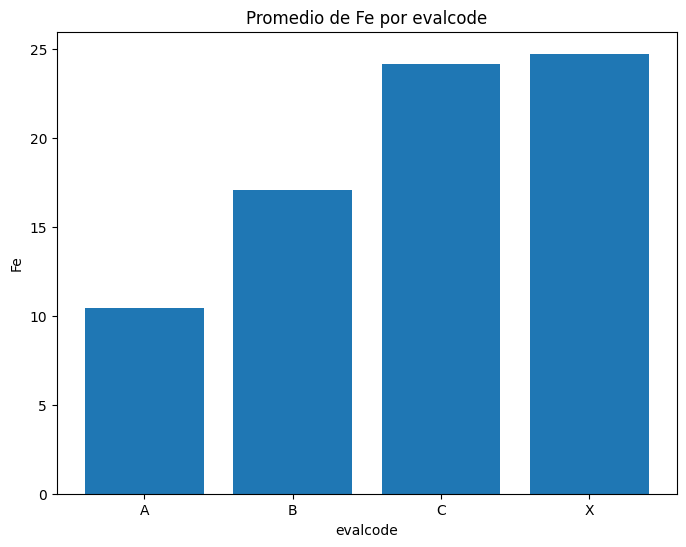

In [13]:
import matplotlib.pyplot as plt
grouped_means = df.groupby('evalcode')['Fe'].mean()

# Convierte la serie en un DataFrame y agrega una columna con los nombres de las filas
table_df = pd.DataFrame(grouped_means).reset_index()

# Crea el gráfico de barras
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(table_df['evalcode'], table_df['Fe'])

# Agrega etiquetas y título
ax.set_xlabel('evalcode')
ax.set_ylabel('Fe')
ax.set_title('Promedio de Fe por evalcode')

# Muestra el gráfico
plt.show()


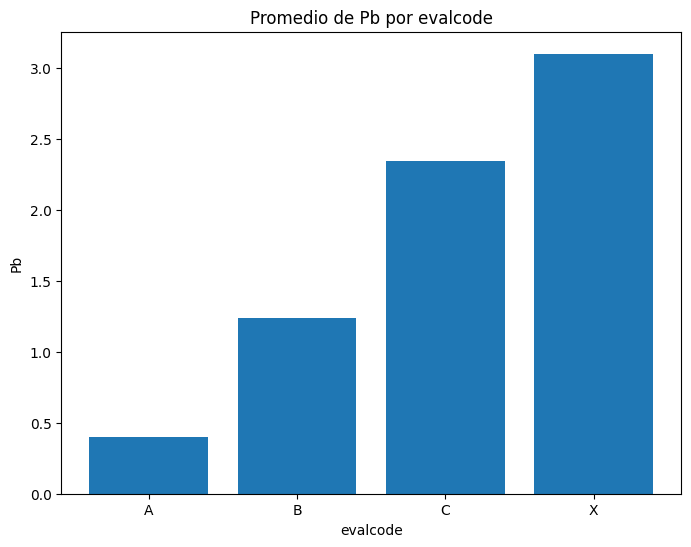

In [14]:
grouped_means = df.groupby('evalcode')['Pb'].mean()

# Convierte la serie en un DataFrame y agrega una columna con los nombres de las filas
table_df = pd.DataFrame(grouped_means).reset_index()

# Crea el gráfico de barras
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(table_df['evalcode'], table_df['Pb'])

# Agrega etiquetas y título
ax.set_xlabel('evalcode')
ax.set_ylabel('Pb')
ax.set_title('Promedio de Pb por evalcode')

# Muestra el gráfico
plt.show()

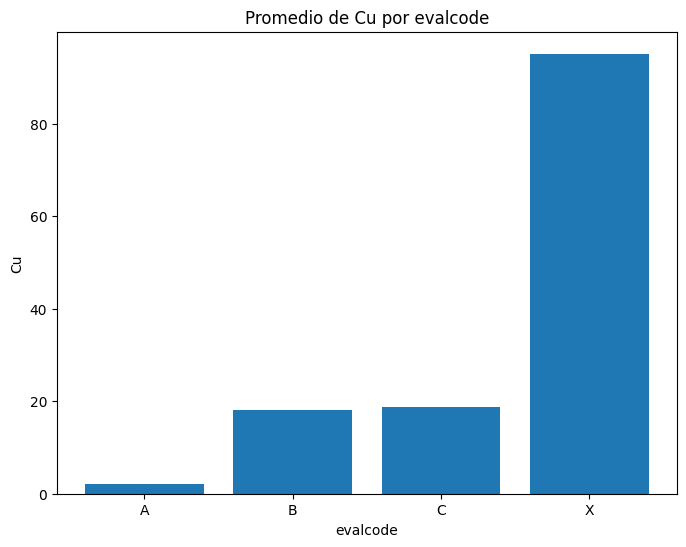

In [15]:
grouped_means = df.groupby('evalcode')['Cu'].mean()

# Convierte la serie en un DataFrame y agrega una columna con los nombres de las filas
table_df = pd.DataFrame(grouped_means).reset_index()

# Crea el gráfico de barras
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(table_df['evalcode'], table_df['Cu'])

# Agrega etiquetas y título
ax.set_xlabel('evalcode')
ax.set_ylabel('Cu')
ax.set_title('Promedio de Cu por evalcode')

# Muestra el gráfico
plt.show()

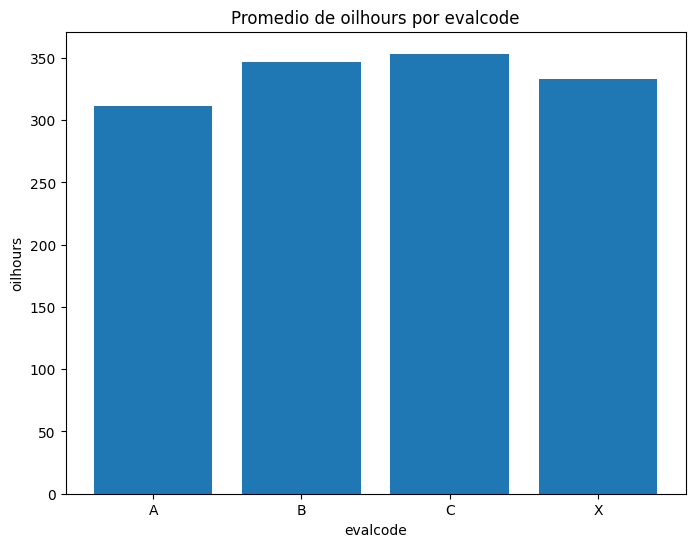

In [16]:
grouped_means = df.groupby('evalcode')['oilhours'].mean()

# Convierte la serie en un DataFrame y agrega una columna con los nombres de las filas
table_df = pd.DataFrame(grouped_means).reset_index()

# Crea el gráfico de barras
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(table_df['evalcode'], table_df['oilhours'])

# Agrega etiquetas y título
ax.set_xlabel('evalcode')
ax.set_ylabel('oilhours')
ax.set_title('Promedio de oilhours por evalcode')

# Muestra el gráfico
plt.show()

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1332 entries, 0 to 1331
Data columns (total 30 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   orderid        1332 non-null   int64  
 1   unitno         1332 non-null   object 
 2   modelid        1332 non-null   object 
 3   evalcode       1332 non-null   object 
 4   asample        1332 non-null   int64  
 5   prev           1332 non-null   int64  
 6   preva          1332 non-null   int64  
 7   oilchangelast  1332 non-null   int64  
 8   oilhours       1332 non-null   int64  
 9   PQI            1332 non-null   int64  
 10  Pb             1332 non-null   int64  
 11  Al             1332 non-null   int64  
 12  P              1332 non-null   int64  
 13  Ca             1332 non-null   int64  
 14  Zn             1332 non-null   int64  
 15  Cu             1332 non-null   int64  
 16  Si             1332 non-null   int64  
 17  Na             1332 non-null   int64  
 18  K       

In [18]:
df.describe()

,orderid,asample,prev,preva,oilchangelast,oilhours,PQI,Pb,Al,P,...,B,Fe,ST,V40,OXI,NIT,SUL,prevb,prevc,prevx
count,1332.000000,1332.000000,1332.000000,1332.000000,1332.000000,1332.000000,1332.000000,1332.000000,1332.000000,1332.000000,...,1332.000000,1332.000000,1332.000000,1332.000000,1332.000000,1332.000000,1332.000000,1332.000000,1332.000000,1332.000000
mean,966.046547,0.158408,2.277778,0.153904,0.596096,342.486486,1.300300,1.575826,1.656907,927.120871,...,2.041291,18.774024,16.054054,111.909835,14.685435,7.268769,21.399399,0.471471,0.317568,0.057057
std,511.663922,0.365261,0.789308,0.360992,0.490863,128.821727,4.773446,2.207382,0.999702,67.035989,...,2.798348,8.916887,9.355252,6.684890,2.658527,1.400274,2.245878,0.499373,0.465705,0.232039
min,1.000000,0.000000,1.000000,0.000000,0.000000,105.000000,0.000000,0.000000,0.000000,559.000000,...,0.000000,2.000000,0.000000,41.300000,9.000000,3.000000,14.000000,0.000000,0.000000,0.000000
25%,652.750000,0.000000,2.000000,0.000000,0.000000,238.000000,0.000000,0.000000,1.000000,889.000000,...,0.000000,12.000000,9.000000,108.275000,13.000000,6.000000,20.000000,0.000000,0.000000,0.000000
50%,1017.500000,0.000000,2.000000,0.000000,1.000000,278.500000,0.000000,1.000000,2.000000,929.000000,...,1.000000,17.000000,15.000000,111.650000,14.000000,7.000000,21.000000,0.000000,0.000000,0.000000
75%,1383.250000,0.000000,3.000000,0.000000,1.000000,478.000000,1.000000,2.000000,2.000000,964.000000,...,3.000000,24.000000,21.000000,115.800000,16.000000,8.000000,23.000000,1.000000,1.000000,0.000000
max,1789.000000,1.000000,4.000000,1.000000,1.000000,600.000000,101.000000,24.000000,15.000000,1342.000000,...,43.000000,61.000000,72.000000,138.000000,33.000000,12.000000,30.000000,1.000000,1.000000,1.000000


In [19]:
df.shape

(1332, 30)

No hay NAs, no hace falta filtrar columnas o filas.
La columna Asample es nuestro target binario. Evalcode no deberia ser usada

<ipython-input-20-8163dc5db349>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


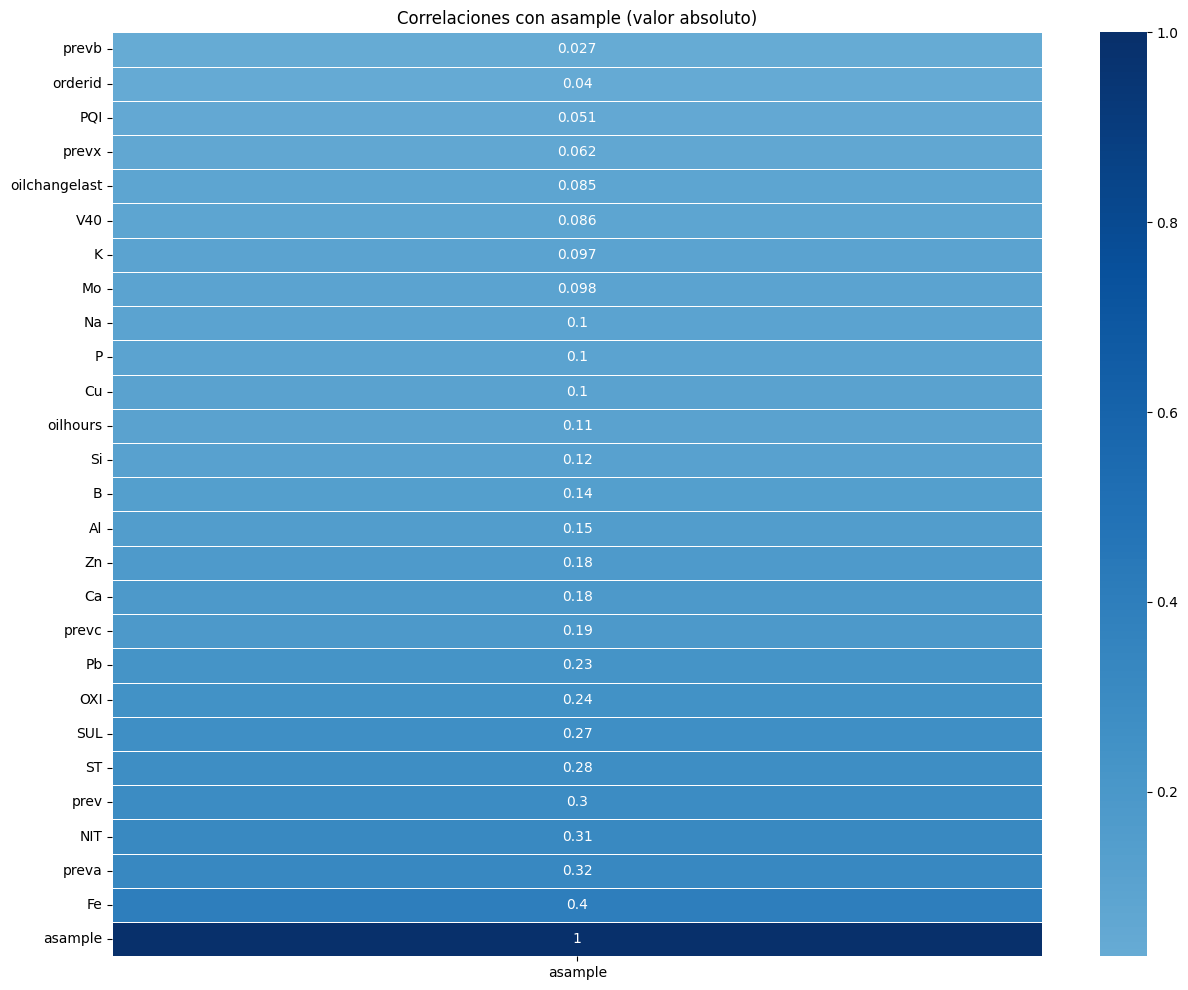

In [20]:
corr_matrix = df.corr()

# Crear un mapa de calor de la matriz de correlación
plt.figure(figsize=(15, 8*1.5))
# Definir una paleta de colores personalizada para colores amigables para personas con daltonismo
color_palette = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728"]

sns.heatmap(abs(corr_matrix[['asample']]).sort_values(by='asample', ascending=True), annot=True, cmap='Blues', center=0, linewidths=0.5, cbar=True)

# Personalizar otras configuraciones según sea necesario
plt.title("Correlaciones con asample (valor absoluto)")
plt.show()



#Regresión lineal

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from lightgbm import LGBMRegressor
from hyperopt import fmin, tpe, hp
from hyperopt.pyll.base import scope

In [ ]:
# Cargar el conjunto de datos
X = df.iloc[:, 5:]
X = X.drop('prev', axis=1)
y = df['asample']


In [ ]:

# Separo en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Regresión lineal
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predicciones
y_pred_linear = linear_model.predict(X_test)

# Uso el treshhold
threshold = 0.5
y_pred_binary = np.where(y_pred_linear > threshold, 1, 0)

# Calcular la media cuadrada
mse_linear = mean_squared_error(y_test, y_pred_binary)
print("Error cuadrático medio de la regresión lineal:", mse_linear)

Error cuadrático medio de la regresión lineal: 0.13857677902621723


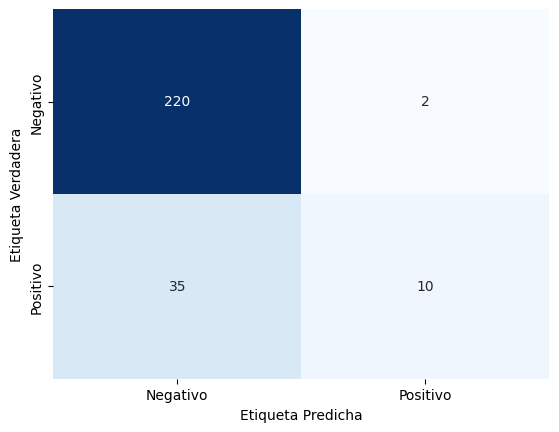

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix


threshold = 0.5
y_pred_binary = np.where(y_pred_linear > threshold, 1, 0)

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred_binary)

# Hago el grafico
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False, xticklabels=['Negativo', 'Positivo'], yticklabels=['Negativo', 'Positivo'])
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Verdadera')
plt.show()


In [ ]:
  tn, fp, fn, tp = confusion_matrix(y_test, y_pred_binary).ravel()

In [ ]:
tn

220

In [ ]:
fp

2

In [ ]:
fn

35

In [ ]:
tp

10

In [ ]:
cm

array([[220,   2],
       [ 35,  10]])

In [ ]:
220*2-2*2-35+10

411

In [ ]:

# Verifico que el puntaje sea el que esperaba que sea. Lo es por lo que puedo usarlo a partir de ahora.
custom_score = custom_scoring_function(y_test, y_pred_binary)
custom_score

411

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
# Calculo el r2
r2_linear = r2_score(y_test, y_pred_linear)
print("Linear Regression R-squared Score:", r2_linear)



Linear Regression R-squared Score: 0.18741635154339842


In [ ]:
import statsmodels.api as sm

In [ ]:
# Calculo residuales
residuals = y_test - y_pred_linear
# Agrego para statmodels
X_test_sm = sm.add_constant(X_test)

# Uso OLS model
ols_model = sm.OLS(y_test, X_test_sm)
ols_results = ols_model.fit()

# Consigo los p valores
p_values = ols_results.pvalues
p_values_sorted = p_values.sort_values()


print("P-values (sorted):")
print(p_values_sorted)



P-values (sorted):
Na               0.001301
Mo               0.022516
ST               0.047181
P                0.077882
V40              0.123501
Fe               0.123605
PQI              0.159647
K                0.160916
oilhours         0.179971
Pb               0.295813
Zn               0.307022
Ca               0.338734
preva            0.354646
NIT              0.596806
OXI              0.619986
Si               0.645110
prevx            0.672949
SUL              0.707100
oilchangelast    0.738264
Al               0.778030
prevc            0.871208
B                0.906309
const            0.938906
Cu               0.944313
prevb            0.973519
dtype: float64


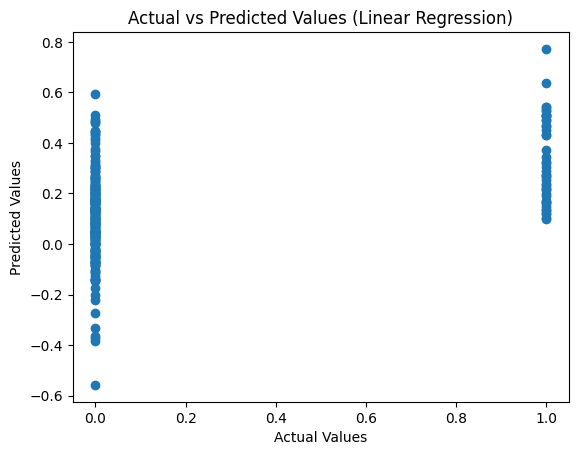

In [ ]:
# Grafico de predichos contra reales
plt.scatter(y_test, y_pred_linear)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values (Linear Regression)")
plt.show()

In [ ]:
# Busco coeficientes
coefficients = linear_model.coef_

# Busco los nombres de variables
variable_names = X.columns

#Codigo para crear una lista ordenada de coeficientes a travez de un dict
variable_coefficients = dict(zip(variable_names, coefficients))


sorted_variable_coefficients = dict(sorted(variable_coefficients.items(), key=lambda item: abs(item[1]), reverse=True))


for variable, coefficient in sorted_variable_coefficients.items():
    print(f"{variable}: {coefficient}")

preva: 0.19792999547837717
prevc: -0.07291647852087713
prevx: -0.07159135516082375
prevb: -0.05342216179667721
NIT: -0.025349165628364152
oilchangelast: -0.024341186055785627
B: -0.01559230620818728
Fe: -0.012938602332259429
OXI: 0.008309955673809105
SUL: -0.007390996510825425
V40: 0.004504714986878827
Mo: 0.0033593507138867384
Pb: 0.0032367329605888875
PQI: -0.0028052805840341347
Si: -0.002510385110065832
Na: -0.0022253059907191026
ST: -0.0010370846133789368
P: 0.0009255476466188428
K: 0.0004950954024114156
Zn: -0.00039033050871560375
Ca: -0.00019481487822141705
oilhours: 0.00019009859168600229
Al: 4.939760108607384e-05
Cu: -4.9366577550676515e-05


#Elastic net And scoring

Regresión de Elastic Net con alpha=0.1 y l1_ratio=0.1


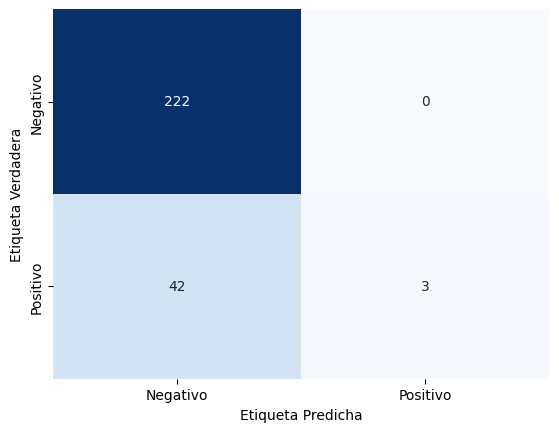

Puntuación Personalizada: 405
Regresión de Elastic Net con alpha=0.1 y l1_ratio=0.3


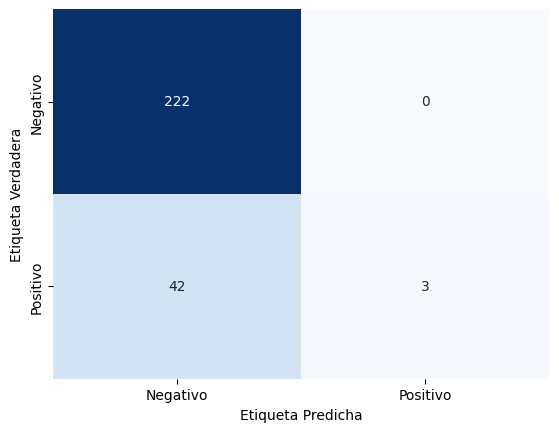

Puntuación Personalizada: 405
Regresión de Elastic Net con alpha=0.1 y l1_ratio=0.5


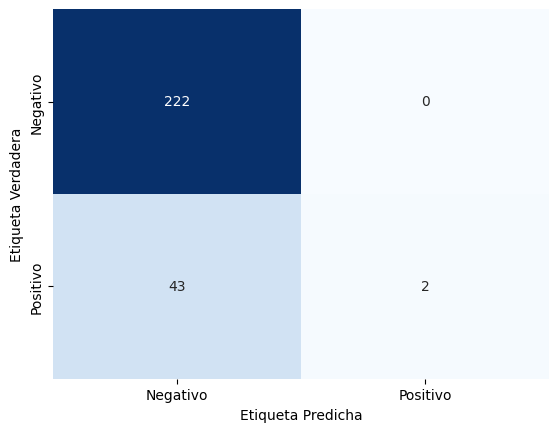

Puntuación Personalizada: 403
Regresión de Elastic Net con alpha=0.5 y l1_ratio=0.1


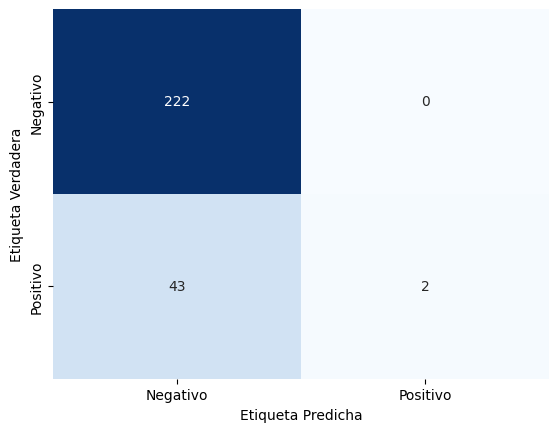

Puntuación Personalizada: 403
Regresión de Elastic Net con alpha=0.5 y l1_ratio=0.3


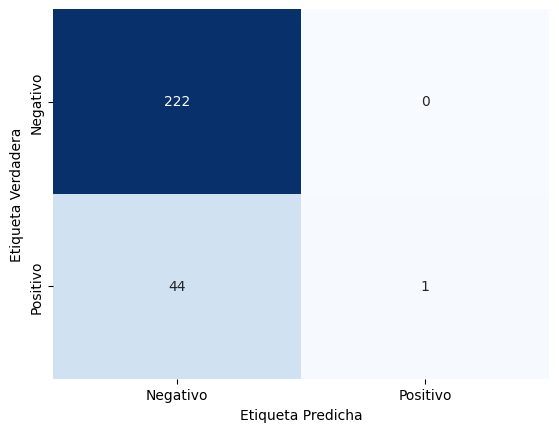

Puntuación Personalizada: 401
Regresión de Elastic Net con alpha=0.5 y l1_ratio=0.5


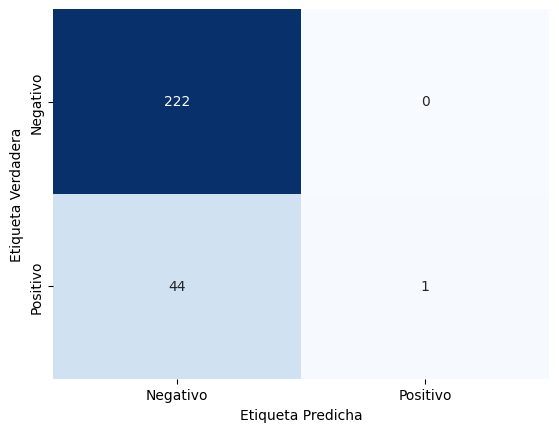

Puntuación Personalizada: 401
Regresión de Elastic Net con alpha=1.0 y l1_ratio=0.1


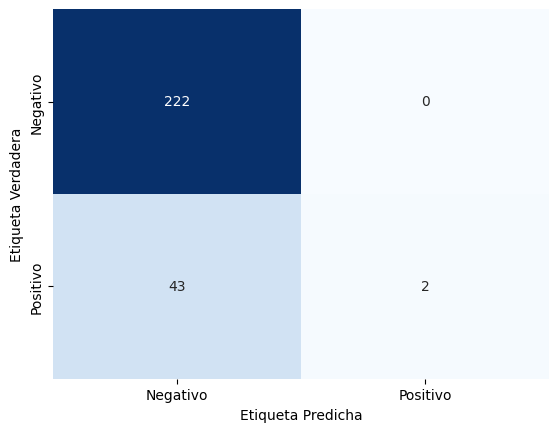

Puntuación Personalizada: 403
Regresión de Elastic Net con alpha=1.0 y l1_ratio=0.3


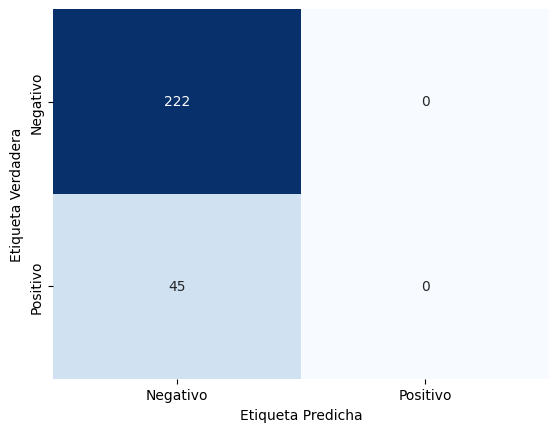

Puntuación Personalizada: 399
Regresión de Elastic Net con alpha=1.0 y l1_ratio=0.5


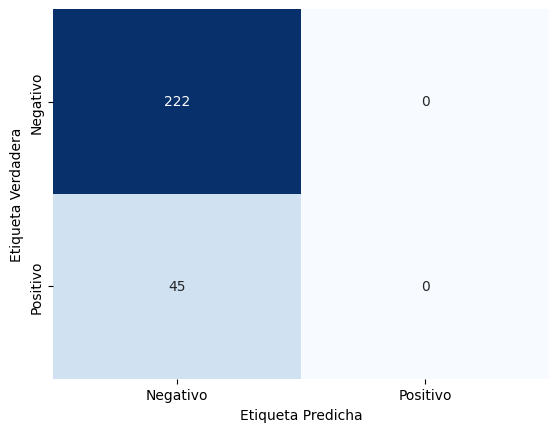

Puntuación Personalizada: 399


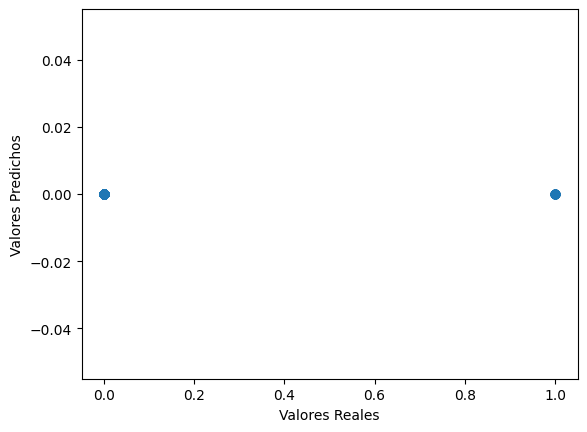

In [ ]:
# Cargar el conjunto de datos
# Suponga que 'X' contiene las características y 'y' contiene la variable objetivo binaria en su conjunto de datos 'df'
X = df.iloc[:, 5:]
X = X.drop('prev', axis=1)
y = df['asample']

# Dividir el conjunto de datos en conjuntos de entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir los valores de alpha y l1_ratio
alphas = [0.1, 0.5, 1.0]
l1_ratios = [0.1, 0.3, 0.5]

# Recorrer los valores de alpha y l1_ratio
for alpha in alphas:
    for l1_ratio in l1_ratios:
        # Crear y ajustar el modelo de regresión Elastic Net
        elastic_net_model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio)
        elastic_net_model.fit(X_train, y_train)

        # Realizar predicciones en el conjunto de validación
        y_pred_elastic_net = elastic_net_model.predict(X_val)

        # Convertir los valores predichos en clases binarias basadas en un valor umbral
        threshold = 0.5
        y_pred_binary = np.where(y_pred_elastic_net > threshold, 1, 0)

        # Calcular e imprimir la matriz de confusión
        cm = confusion_matrix(y_val, y_pred_binary)
        print(f"Regresión de Elastic Net con alpha={alpha} y l1_ratio={l1_ratio}")
        # Crear un mapa de calor
        sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False, xticklabels=['Negativo', 'Positivo'], yticklabels=['Negativo', 'Positivo'])
        plt.xlabel('Etiqueta Predicha')
        plt.ylabel('Etiqueta Verdadera')
        plt.show()

        # Calcular e imprimir la puntuación personalizada
        custom_score = custom_scoring_function(y_val, y_pred_binary)
        print(f"Puntuación Personalizada: {custom_score}")

        # Graficar los valores reales vs predichos
        plt.scatter(y_val, y_pred_binary)
        plt.xlabel("Valores Reales")
        plt.ylabel("Valores Predichos")



In [ ]:
# Crear y ajustar el modelo de regresión Elastic Net
elastic_net_model = ElasticNet(alpha=0.5, l1_ratio=0.3)
elastic_net_model.fit(X_train, y_train)

# Obtener los nombres de las características y los coeficientes
feature_names = X_train.columns
coefficients = elastic_net_model.coef_

# Crear una lista de tuplas que contengan los nombres de las características y los coeficientes
feature_importances = list(zip(feature_names, coefficients))

# Ordenar la lista por la magnitud de los coeficientes
feature_importances.sort(key=lambda x: abs(x[1]), reverse=True)

# Imprimir las importancias de las características ordenadas
for feature, importance in feature_importances:
    print(f"{feature}: {importance}")


Fe: -0.015106195053026397
P: 0.0008870702857194366
ST: -0.0007443056389728803
Zn: -0.0005715409215560609
K: -0.00047394269750372127
oilhours: 0.00037834140814695403
Ca: -0.00016185137517264774
Cu: -0.00010747325388933804
preva: 0.0
oilchangelast: -0.0
PQI: -0.0
Pb: -0.0
Al: -0.0
Si: -0.0
Na: -0.0
Mo: -0.0
B: -0.0
V40: 0.0
OXI: -0.0
NIT: -0.0
SUL: -0.0
prevb: -0.0
prevc: -0.0
prevx: -0.0


#Logistic regression

/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:1819: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:1872: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.2455441513829613
            Iterations: 55
            Function evaluations: 78
            Gradient evaluations: 55
Regresión Logística con alpha=10.0
Puntuación Personalizada: 403


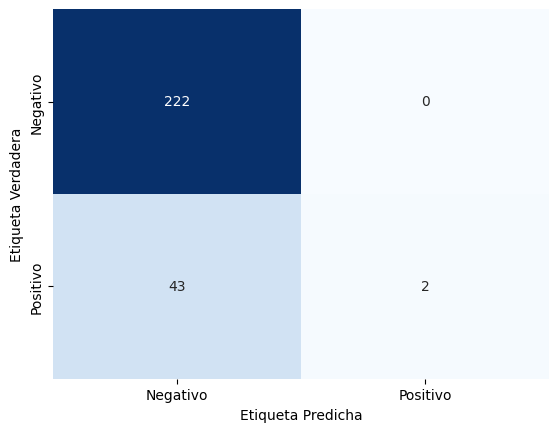

/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:1819: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:1872: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.24368165822569285
            Iterations: 60
            Function evaluations: 82
            Gradient evaluations: 60
Regresión Logística con alpha=9
Puntuación Personalizada: 389


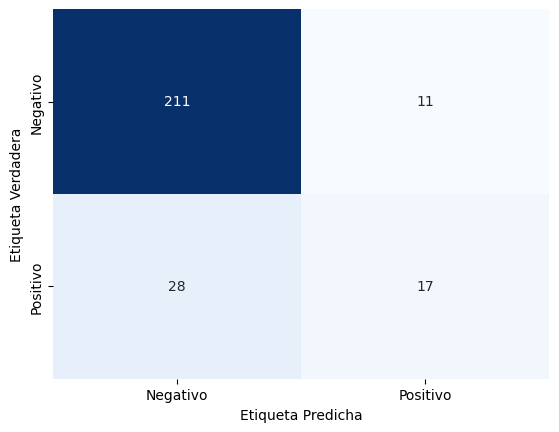

/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:1819: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:1872: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.2417208066492263
            Iterations: 70
            Function evaluations: 92
            Gradient evaluations: 70
Regresión Logística con alpha=8
Puntuación Personalizada: 391


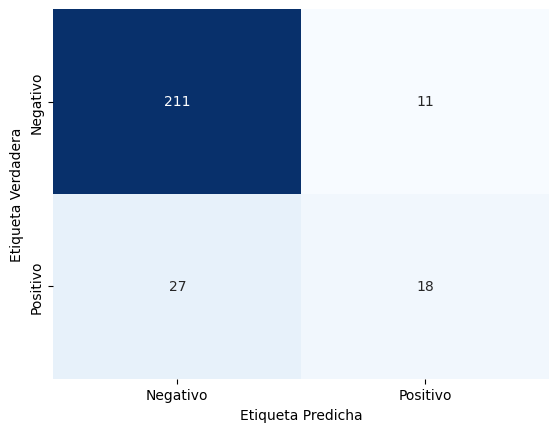

/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:1819: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:1872: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.2350012605614793
            Iterations: 90
            Function evaluations: 113
            Gradient evaluations: 90
Regresión Logística con alpha=5
Puntuación Personalizada: 403


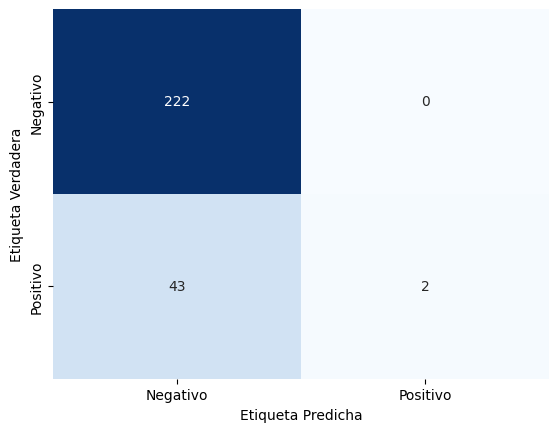

/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:1819: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:1872: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.23226771549796765
            Iterations: 87
            Function evaluations: 110
            Gradient evaluations: 87
Regresión Logística con alpha=4
Puntuación Personalizada: 399


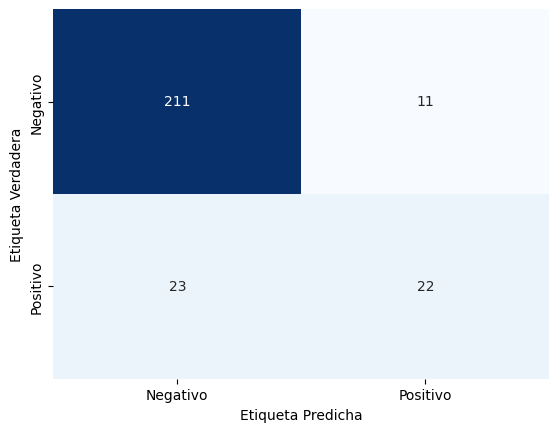

/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:1819: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:1872: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.2258832916365929
            Iterations: 101
            Function evaluations: 124
            Gradient evaluations: 101
Regresión Logística con alpha=2.0
Puntuación Personalizada: 399


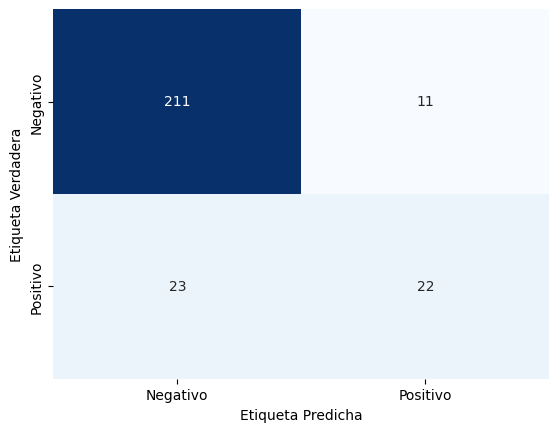

/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:1819: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:1872: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.22219914343342081
            Iterations: 107
            Function evaluations: 130
            Gradient evaluations: 107
Regresión Logística con alpha=1.0
Puntuación Personalizada: 401


/usr/local/lib/python3.10/dist-packages/statsmodels/base/l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 1 out of 25 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)


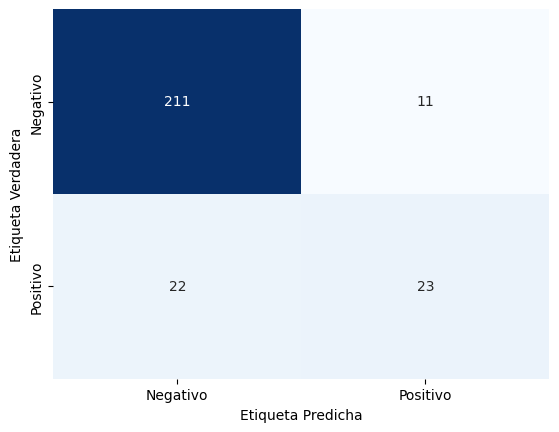

Mejor Modelo:
                           Logit Regression Results                           
Dep. Variable:                asample   No. Observations:                 1065
Model:                          Logit   Df Residuals:                     1050
Method:                           MLE   Df Model:                           14
Date:                Sat, 10 Jun 2023   Pseudo R-squ.:                -0.08563
Time:                        22:47:45   Log-Likelihood:                -500.35
converged:                       True   LL-Null:                       -460.88
Covariance Type:            nonrobust   LLR p-value:                     1.000
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const                  0        nan        nan        nan         nan         nan
preva             0.9716      0.472      2.056      0.040       0.046       1.898
oilchangelast          0  

In [ ]:
import statsmodels.api as sm

X = df.iloc[:, 5:]
X = X.drop('prev', axis=1)
y = df['asample']

# Dividir el conjunto de datos en conjuntos de entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Agregar un término constante a la matriz de características
X_train = sm.add_constant(X_train)
X_val = sm.add_constant(X_val)

# Definir valores alfa
alphas = [10.0,9, 8, 5, 4, 2.0, 1.0]

# Inicializar variables para realizar un seguimiento de la mejor puntuación y modelo
best_score = float('-inf')
best_result = None

# Bucle a través de los valores alfa
for alpha in alphas:
    # Crear y ajustar el modelo de regresión logística regularizado
    logit_model = sm.Logit(y_train, X_train)
    result = logit_model.fit_regularized(alpha=alpha)

    # Realizar predicciones en el conjunto de validación
    y_pred_logistic = result.predict(X_val)

    # Convertir probabilidades predichas en predicciones binarias
    y_pred_binary = (y_pred_logistic > 0.5).astype(int)

    # Calcular e imprimir la puntuación personalizada
    custom_score = custom_scoring_function(y_val, y_pred_binary)
    print(f"Regresión Logística con alpha={alpha}")
    print(f"Puntuación Personalizada: {custom_score}")



    # Calcular la matriz de confusión
    conf_matrix = confusion_matrix(y_val, y_pred_binary)

    # Crear un mapa de calor
    sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', cbar=False, xticklabels=['Negativo', 'Positivo'], yticklabels=['Negativo', 'Positivo'])
    plt.xlabel('Etiqueta Predicha')
    plt.ylabel('Etiqueta Verdadera')
    plt.show()

    # Actualizar la mejor puntuación y el modelo si es necesario
    if custom_score > best_score:
        best_score = custom_score
        best_result = result

# Imprimir el resumen del mejor modelo
print("Mejor Modelo:")
print(best_result.summary())



In [ ]:
# Consigo los p valores
pvalues = best_result.pvalues

# Ordeno
sorted_features = pvalues.sort_values()


print(sorted_features)

Fe               0.000784
oilhours         0.018832
preva            0.039745
Cu               0.332810
ST               0.381509
Si               0.415953
V40              0.497473
Na               0.513608
B                0.567205
K                0.634412
Zn               0.674922
OXI              0.745476
P                0.847530
PQI              0.854925
Pb               0.973792
const                 NaN
oilchangelast         NaN
Al                    NaN
Ca                    NaN
Mo                    NaN
NIT                   NaN
SUL                   NaN
prevb                 NaN
prevc                 NaN
prevx                 NaN
dtype: float64


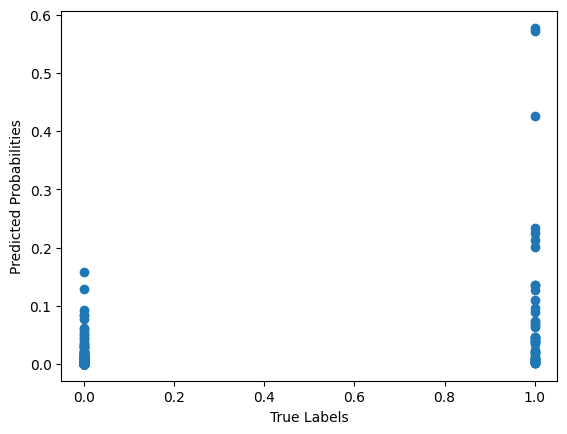

In [ ]:
import matplotlib.pyplot as plt

# Busco las predicciones
y_pred_logistic = best_result.predict(X_val)

# Hago grafico
plt.scatter(y_val, y_pred_logistic)
plt.xlabel('True Labels')
plt.ylabel('Predicted Probabilities')
plt.show()

#Lightgbm accuracy

In [ ]:
!pip install scikit-optimize

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Importar bibliotecas necesarias
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from skopt import BayesSearchCV
from lightgbm import LGBMClassifier
from sklearn.metrics import make_scorer
from sklearn.metrics import confusion_matrix

# Cargar y dividir los datos
df1 = df.iloc[:, 4:]  # Seleccionar todas las filas y columnas a partir de la cuarta columna
X_train, X_val, y_train, y_val = train_test_split(df1.drop('asample', axis=1), df1['asample'], test_size=0.2, random_state=42)

# Crear un objeto de puntuación a partir de la función de puntuación personalizada
scorer = make_scorer(custom_scoring_function, greater_is_better=True)  # Establecer greater_is_better en True para la precisión

# Definir el espacio de búsqueda de parámetros
param_space = {
    'n_estimators': (1, 1000),
    'num_leaves': (2, 1000),
    'learning_rate': (0.001, 0.3, 'log-uniform'),
    'min_data_in_leaf': (10, 10000),
    'feature_fraction': (1e-3, 1.0, 'log-uniform')
}

# Inicializar el clasificador LightGBM
lgbm = LGBMClassifier()

from sklearn.metrics import accuracy_score

# Realizar la optimización de búsqueda bayesiana utilizando la precisión como métrica de puntuación
opt = BayesSearchCV(lgbm, param_space, n_iter=50, cv=5, n_jobs=-1, scoring='accuracy')
opt.fit(X_train, y_train)

# Obtener los mejores parámetros de la optimización
best_params = opt.best_params_




[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10


In [ ]:
# Entrenar y evaluar modelos con 50 semillas diferentes utilizando los parámetros optimizados
np.random.seed(42)
prob_results = []
for i in range(50):
    # Establecer la semilla para la reproducibilidad
    np.random.seed(i)
    # Inicializar el clasificador LightGBM con los mejores parámetros de la optimización
    model_acc = LGBMClassifier(**best_params, random_state=i)
    model_acc.fit(X_train, y_train, eval_set=[(X_val, y_val)], early_stopping_rounds=10)  # Habilitar la detención temprana
    # Predecir en el conjunto de validación
    prob = model_acc.predict_proba(X_val)[:, 1]
    prob_results.append(prob)

# Utilizar la probabilidad promedio para obtener las predicciones del nuevo modelo
avg_prob = np.mean(prob_results, axis=0)
new_preds = (avg_prob > 0.5).astype(int)

# Evaluar el rendimiento del modelo promedio en el conjunto de validación
avg_model_score_acc = accuracy_score(y_val, new_preds)
avg_model_score_sco = custom_scoring_function(y_val, new_preds)



In [ ]:

print("Scores per seed: ", [accuracy_score(y_val, (prob > 0.5).astype(int)) for prob in prob_results])
print("Averaged score accuracy: ", avg_model_score_acc)
print("Averaged score: ", avg_model_score_sco)

Scores per seed:  [0.8576779026217228, 0.8576779026217228, 0.8576779026217228, 0.8576779026217228, 0.8576779026217228, 0.8576779026217228, 0.8576779026217228, 0.8576779026217228, 0.8576779026217228, 0.8576779026217228, 0.8576779026217228, 0.8576779026217228, 0.8576779026217228, 0.8576779026217228, 0.8576779026217228, 0.8576779026217228, 0.8576779026217228, 0.8576779026217228, 0.8576779026217228, 0.8576779026217228, 0.8576779026217228, 0.8576779026217228, 0.8576779026217228, 0.8576779026217228, 0.8576779026217228, 0.8576779026217228, 0.8576779026217228, 0.8576779026217228, 0.8576779026217228, 0.8576779026217228, 0.8576779026217228, 0.8576779026217228, 0.8576779026217228, 0.8576779026217228, 0.8576779026217228, 0.8576779026217228, 0.8576779026217228, 0.8576779026217228, 0.8576779026217228, 0.8576779026217228, 0.8576779026217228, 0.8576779026217228, 0.8576779026217228, 0.8576779026217228, 0.8576779026217228, 0.8576779026217228, 0.8576779026217228, 0.8576779026217228, 0.8576779026217228, 0

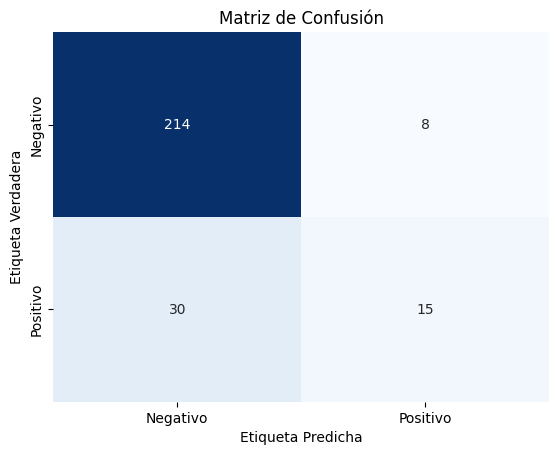

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix for averaged model predictions
cm = confusion_matrix(y_val, new_preds)

# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=['Negativo', 'Positivo'], yticklabels=['Negativo', 'Positivo'])

# Set labels and title
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Verdadera')
plt.title('Matriz de Confusión')

# Display the plot
plt.show()



In [ ]:
# Chequeo si todas las semillas predicen lo mismo
same_predictions = all(np.array_equal(new_preds, (np.array(prob) > 0.5).astype(int)) for prob in prob_results)

if same_predictions:
    print("All seed models are predicting the same.")
else:
    print("Seed models are predicting differently.")

All seed models are predicting the same.


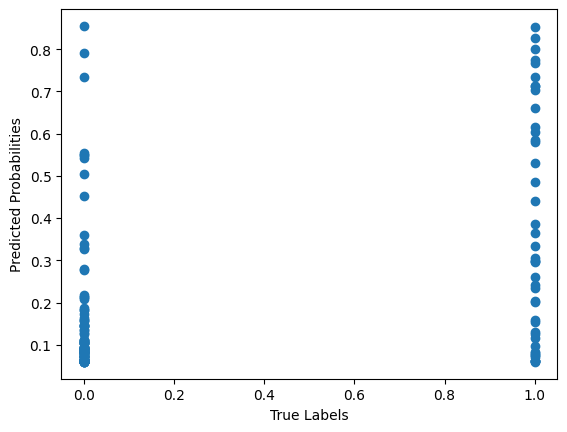

In [ ]:
# Busco las predicciones
y_pred_lgbm = model_acc.predict_proba(X_val)[:, 1]

#Hago el grafico
plt.scatter(y_val, y_pred_lgbm)
plt.xlabel('True Labels')
plt.ylabel('Predicted Probabilities')
plt.show()

#Lightgbm


In [ ]:
# Importar las bibliotecas necesarias
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from skopt import BayesSearchCV
from lightgbm import LGBMClassifier
from sklearn.metrics import make_scorer
from sklearn.metrics import confusion_matrix

# Cargar y dividir los datos
df1 = df.iloc[:, 4:]  # Seleccionar todas las filas y columnas a partir de la cuarta columna
X_train, X_val, y_train, y_val = train_test_split(df1.drop('asample', axis=1), df1['asample'], test_size=0.2, random_state=42)



# Crear un objeto de puntuación a partir de la función de puntuación personalizada
scorer = make_scorer(custom_scoring_function, greater_is_better=True)  # Establecer greater_is_better en False

# Definir el espacio de búsqueda de parámetros
param_space = {
    'n_estimators': (1, 1000),
    'num_leaves': (2, 1000),
    'learning_rate': (0.001, 0.3, 'log-uniform'),
    'min_data_in_leaf': (10, 10000),
    'feature_fraction': (1e-3, 1.0, 'log-uniform')
}

# Inicializar el clasificador LightGBM
lgbm = LGBMClassifier()

# Realizar la optimización de búsqueda bayesiana
opt = BayesSearchCV(lgbm, param_space, n_iter=50, cv=5, n_jobs=-1, scoring=scorer, refit=False, random_state=42)
opt.fit(X_train, y_train)

# Obtener los mejores parámetros de la optimización
best_params = opt.best_params_








In [ ]:
from lightgbm import early_stopping
# Entrenar y evaluar modelos con 50 semillas diferentes utilizando los parámetros optimizados
prob_results = []
for i in range(50):
    # Inicializar el clasificador LightGBM con los mejores parámetros de la optimización y una semilla aleatoria diferente para cada iteración
    model = LGBMClassifier(**best_params, random_state=i)
    model.fit(X_train, y_train, eval_set=[(X_val, y_val)], callbacks=[early_stopping(10)])  # Usar el callback early_stopping
    # Predecir probabilidades en el conjunto de validación
    probs = model.predict_proba(X_val)[:, 1]  # Usar las probabilidades de la clase 1
    prob_results.append(probs)
# Usar la probabilidad promedio para obtener las predicciones del nuevo modelo
avg_prob = np.mean(prob_results, axis=0)


# Evaluar el rendimiento del modelo promedio en el conjunto de validación
avg_model_preds = (avg_prob > 0.5).astype(int)
avg_model_score = custom_scoring_function(y_val, avg_model_preds)

# Imprimir las puntuaciones para cada semilla y la puntuación promedio
print("Puntuaciones por semilla: ", [custom_scoring_function(y_val, (np.array(prob) > 0.5).astype(int)) for prob in prob_results])
print("Puntuación promedio: ", avg_model_score)


In [ ]:

print("Scores per seed: ", [custom_scoring_function(y_val, (np.array(prob) > 0.5).astype(int)) for prob in prob_results])
print("Averaged score: ", avg_model_score)

Scores per seed:  [409, 415, 409, 411, 411, 409, 407, 413, 407, 411, 403, 409, 407, 407, 407, 407, 415, 405, 415, 407, 409, 407, 409, 411, 409, 407, 409, 405, 409, 411, 411, 409, 409, 411, 411, 403, 411, 405, 413, 415, 413, 407, 407, 405, 413, 413, 413, 403, 415, 413]
Averaged score:  411


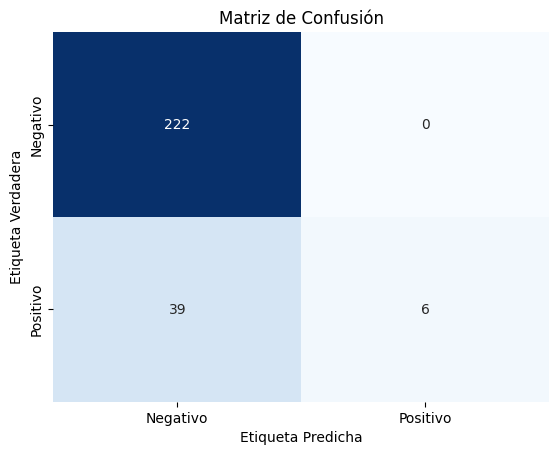

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la matriz de confusión para las predicciones del modelo promedio
cm = confusion_matrix(y_val, avg_model_preds)

# Crear un mapa de calor de la matriz de confusión
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=['Negativo', 'Positivo'], yticklabels=['Negativo', 'Positivo'])

# Establecer etiquetas y título
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Verdadera')
plt.title('Matriz de Confusión')

# Mostrar el gráfico
plt.show()


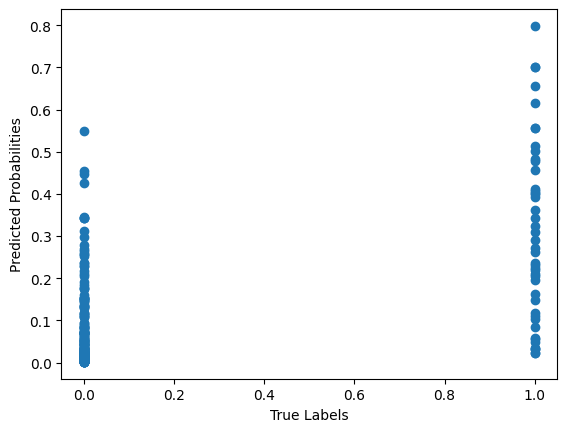

In [ ]:

# Busco predicciones
y_pred_lgbm = model.predict_proba(X_val)[:, 1]

#Hago grafico
plt.scatter(y_val, y_pred_lgbm)
plt.xlabel('True Labels')
plt.ylabel('Predicted Probabilities')
plt.show()

In [ ]:
# Chequeo, en este caso no todas dan lo mismo
same_predictions = all(np.array_equal(avg_model_preds, (np.array(prob) > 0.5).astype(int)) for prob in prob_results)

if same_predictions:
    print("All seed models are predicting the same.")
else:
    print("Seed models are predicting differently.")

Seed models are predicting differently.


In [ ]:
#Busco la importancia de variables
feature_names = X_train.columns.tolist()
feature_importances = dict(zip(feature_names, model.feature_importances_))
sorted_feature_importances = dict(sorted(feature_importances.items(), key=lambda x: x[1], reverse=True))

In [ ]:
sorted_feature_importances

{'Zn': 726,
 'V40': 651,
 'Ca': 640,
 'P': 572,
 'ST': 517,
 'Na': 499,
 'oilhours': 458,
 'OXI': 358,
 'Cu': 353,
 'K': 348,
 'Fe': 288,
 'B': 244,
 'SUL': 206,
 'NIT': 201,
 'Al': 163,
 'Mo': 160,
 'Si': 145,
 'Pb': 129,
 'prev': 113,
 'oilchangelast': 88,
 'PQI': 48,
 'prevc': 46,
 'prevb': 37,
 'preva': 28,
 'prevx': 3}